# Theory of matplotlib

[Matplotlib](https://matplotlib.org/stable/index.html) is an open source tool kit for representing and visualizing data. It's based the MATLAB programming environment and borrows many of these elements.

In order to use it, you of course need to install it on your system or in your virtual environment (`pip install matplotlib`). After that, you can import it into Python:

In [2]:
import matplotlib

Matplotlib has several layers. 

- A **backend** layer, which deals with the rendering of plots to screen or files
- An **artist** layer on top of the backend, which describes how data is arranged and which shapes are used.
- A **scripting** layer, which simplifies access to the Artist and Backend layers

see http://www.aosabook.org/en/matplotlib.html


### Backend layer

A backend is an abstraction layer which knows how to interact with the operating environment. This environment can be an operating system (mac-os, linux, windows etc.) or the browser. The backend knows how to render matplotlib commands. In jupyter notebooks we use the inline backend. 

Jupyter has some specialized support for matplotlib and this is enabled by using the IPython magic `%matplotlib notebook`. It configures matplotlib to render into the browser. 

In [ ]:
import matplotlib
%matplotlib inline

In [ ]:
import matplotlib as mpl

matplotlib has a lot of **non pythonic** naming conventions, like `get` and `set`. These patterns are more common in java. You can hit Tab though for type hint autocompletion in the Jupyter Notebook. 

### Artist layer

The artist layer is an abstraction around drawing and layout primitives. It contains containers such as `Figure`, `Subplot`, and `Axes`. It also contains primitives, such as a `Line2D` and `Rectangle`, and collections, such as a `PathCollection`. 

The Artist hierarchy is the middle layer of the matplotlib stack, and is the place where much of the heavy lifting happens. Consider `FigureCanvas` from the backend as the paper, the `Artist` is the object that knows how to take the Renderer (the paintbrush) and put ink on the canvas. Everything you see in a matplotlib Figure is an Artist instance (axes, titles, lines etc). See https://matplotlib.org/1.3.0/api/artist_api.html

In [3]:
__author__ = 'John Hunter and Michael Droettboom'

# Import the FigureCanvas from the backend of your choice
#  and attach the Figure artist to it.
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
fig = Figure()
canvas = FigureCanvas(fig)

# Import the numpy library to generate the random numbers.
import numpy as np
x = np.random.randn(10000)

# Now use a figure method to create an Axes artist; the Axes artist is
#  added automatically to the figure container fig.axes.
# Here "111" is from the MATLAB convention: create a grid with 1 row and 1
#  column, and use the first cell in that grid for the location of the new
#  Axes.
ax = fig.add_subplot(111)

# Call the Axes method hist to generate the histogram; hist creates a
#  sequence of Rectangle artists for each histogram bar and adds them
#  to the Axes container.  Here "100" means create 100 bins.
ax.hist(x, 10)

# Decorate the figure with a title and save it.
ax.set_title('Normal distribution with $\mu=0, \sigma=1$')

# the backend - the one for the jupiter notebooks -  isn't able to render this directly. 
# It expects the scripting layer pyplot to have created all of the objects. 
# we'll save the figure to a png file instead and do a quick html cell magic and execute that, 
# and see the rendered image.
canvas.print_png('matplotlib_histogram.png')
#fig.savefig('matplotlib_histogram.png')

In [4]:
%%html
<img src = 'matplotlib_histogram.png' />

### Scripting layer

The scripting layer simplifies access to the `Artist` and `Backend` layers. A common used scripting layer is `pyplot`

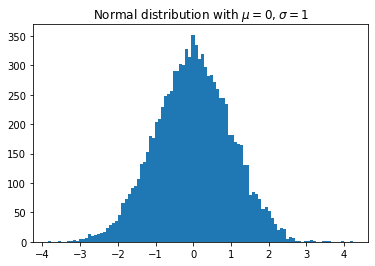

In [5]:
import matplotlib.pyplot as plt
import numpy as np

x = np.random.randn(10000)
plt.hist(x, 100)
plt.title(r'Normal distribution with $\mu=0, \sigma=1$')
plt.show()

### Another example: Basic plots


As you can see the the pyplot scripting interface is managing a lot of objects for you. It keeps track of the latest figure (Figure1), of sub plots and of the axis objects. The pyplot module itself has a function which is called `plot` taking care of redirecting calls to the current axis object.


In [6]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

#create a new figure and assiociate it with the back end
fig = Figure()
canvas = FigureCanvas(fig)
ax = fig.add_subplot(111)
ax.plot(3,4, '.')
canvas.print_png('test.png')

In [7]:
%%html
<img src = 'test.png' />

### Overlay artist shapes

You can add artists to an axes object at any time. Pyplot is doing that for us when we call the plot function. It's determining what shape we want from the string, the location associate with that shape, then it's creating a patch object and adding that to the axes. For instance if i add three datapoints to an axes object it will put that on the same figure. The points are rendered in different colors, as the axes object recognizes them as different data series.


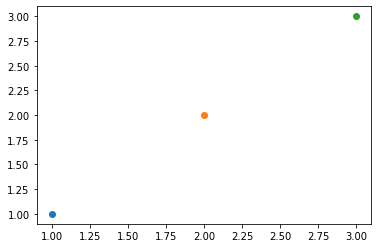

In [8]:
plt.figure()
plt.plot(1,1, 'o')
plt.plot(2,2, 'o')
plt.plot(3,3, 'o')
plt.show()

### Behind the scenes 

 Text(0.5, 1.0, ''),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

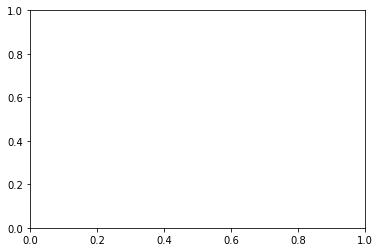

In [9]:
ax = plt.gca() #get access to the axes
ax.get_children()

We see:
- The three line 2D objects are our data points. 
- The number of spines are actual renderings of the borders of the frame including tic markers
- Two axis objects x and y axis
- Text objects, which are the labels for the chart. 
- A rectangle which is the background for the axis

### Access and change plot features
Pyplot is going to retrieve the current figure with the function `gcf` and then get the current axes with the function `gca`. Pyplot is keeping track of the axes objects for you. However they're there and we can get them when we want to use them or modify them



In [ ]:
%matplotlib notebook
# Simple script for barplot
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'R', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [38, 6, 45, 25, 70]

plt.bar(pos, popularity, align='center')
plt.xticks(pos, languages)
plt.ylabel('% Popularity')
plt.title('5 Languages for Math & Data \nby % Popularity on Stack Overflow')
 
plt.show()

In [ ]:
%matplotlib notebook
# Modified script for bar plot
import matplotlib.pyplot as plt
import numpy as np

plt.figure()

languages =['Python', 'R', 'Java', 'C++', 'JavaScript']
pos = np.arange(len(languages))
popularity = [38, 6, 45, 25, 70]

# change the bar color to be less bright blue
bars = plt.bar(pos, popularity, align='center', linewidth=0, color='lightslategrey')
# change one bar, the python bar, to a contrasting color
bars[0].set_color('#1F77B4')

# soften all labels by turning grey
plt.xticks(pos, languages, alpha=0.8)
# remove the Y label since bars are directly labeled
#plt.ylabel('% Popularity', alpha=0.8)
plt.title('5 Languages for Math & Data \nby % popularity on Stack Overflow', alpha=0.8)

# remove all the ticks (both axes), and tick labels on the Y axis
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

    
# direct label each bar with Y axis values
for bar in bars:
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 5, str(int(height)) + '%', 
                 ha='center', color='w', fontsize=11)
plt.show()

---

## Casus the heatmap
The following code demonstrates the drawing of a heatmap. It is your job to add labels and titles

In [ ]:
# do not change this code. It just reads a table into a dataframe (matrix)
import pandas as pd
df = pd.read_table('data/count.data')
df.index = df['geneID']
df = df.drop('geneID', axis=1)
df.head()
#end do not change this code

In [ ]:
#let us create a heatmap
#change the plt into a more fancy plot with labels etc
plt.figure()
plt.imshow(df, cmap="YlGnBu")
plt.colorbar()
plt.show()


## Casus the Iris dataset
The following code is a demonstration of two drawings of the iris dataset. Can you change the first one in sepal width and sepal length

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target # kind of iris

plt.figure()
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend()
plt.show()

In [ ]:
# Load the data
from sklearn.datasets import load_iris
iris = load_iris()

from matplotlib import pyplot as plt

# The indices of the features that we are plotting
x_index = 0
y_index = 1


# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

## Assignment

Can you create a line plot?

### Documentation
Further more, remember that the function declaration from most of the functions in matplotlib end with an open set of keyword arguments. There are a lot of different properties you can control through these keyword arguments. More documentation is to be found on https://matplotlib.org/contents.html and a good cheat sheet is https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf